In [1]:
mod_input=True
mod_topo=True
leak_rate = 0.2
gradient= 0.00075# 0.0005
gain = 1.75
radical=False
radical_bis=False
grad2=1.25
breadth=600
expon=3

remove_stop_words = False
do_shuffle = False


if do_shuffle:
    intact_status_txt = "shuffled"
else:
    intact_status_txt = "intact"

print(intact_status_txt)
# baseline with slow leak rate

intact


In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PeterDell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Import package
import wikipedia# Specify the title of the Wikipedia page
import random
import matplotlib.pyplot as plt


In [4]:
import urllib.request
import requests
import numpy as np
import seaborn as sns

In [5]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

Using Numpy backend.


In [6]:
wiki2vec = Wikipedia2Vec.load('C:/Users/PeterDell/Google Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/enwiki_20180420_100d.pkl')


In [7]:
wiki = urllib.request.urlopen('https://en.wikipedia.org/wiki/Special:Random')
response=requests.get('https://en.wikipedia.org/wiki/Special:Random')


In [8]:
print(response.url)

https://en.wikipedia.org/wiki/Henry_Fleetwood_(Preston_MP)


In [9]:
# Import package
import wikipedia# Specify the title of the Wikipedia page

In [10]:
item = wikipedia.random(pages=1)
print(item)

Mario Fernández (footballer, born 1988)


In [11]:
rand_temp = random.randint(0,10)
print(rand_temp)

4


In [12]:
vectorDim = 100
inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)
inputDataText = []


(0, 100)


In [13]:
vectorDim = 100
inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)
inputDataText = []
# here we create text and embedding files with 
# num_event events or paragraphs, of event_size words, with vari_size variability
ground_truth = []
num_events = 20
event_size= 25
vari_size = 150

event_count = 0

while event_count < num_events:
    # get a random page from wikipedia
    item = wikipedia.random(pages=1)
    # print(item)
    try:
        wiki = wikipedia.page(item)# Extract the plain text content of the page
        text = wiki.content.split()
    except wikipedia.exceptions.DisambiguationError as e:
        print("\nDisambiguation error   ", e.options)
        text=[]
    except wikipedia.exceptions.PageError as e:
        print("\nException error   ",e)
        text=[]
    # remove stop words from word list
    stop_words = stopwords.words('english')
    #print(stop_words)
    for stop_word in stop_words:
        while stop_word in text :
            text.remove(stop_word)

    if len(text) > 500:
        print("\n\n", event_count, "*******************   :", item)
        #print("    ",text)
        #get rid of upper case
        text = [s.replace(s, s.lower()) for s in text]

        #now we will get the right number of words for a paragraph/event that are wiki2vec legal        
        count = 0
        num = 0
        rand_temp = random.randint(0,vari_size)
        ground_truth.append(int(event_size + rand_temp))
        while count < event_size + rand_temp:
            if wiki2vec.get_word(text[num]):
                inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(text[num])]), axis=0)
                inputDataText.append(text[num]) 
                print(text[num], num, count, end = ' ')
                count = count + 1
            num = num+1
        event_count = event_count + 1


(0, 100)


 0 *******************   : Shock Value II
shock 0 0 value 1 1 ii 2 2 third 3 3 studio 4 4 album 5 5 american 6 6 record 7 7 producer 8 8 rapper 9 9 it 11 10 serves 12 11 sequel 13 12 shock 14 13 slated 16 14 2008 17 15 project 19 16 pushed 20 17 2009 21 18 tentatively 22 19 confirmed 23 20 november 24 21 2009 26 22 blackground 27 23 pushed 30 24 back 31 25 finally 32 26 released 33 27 december 34 28 2009 36 29 uk 37 30 december 38 31 8 39 32 background 42 33 production 43 34 timbaland 45 35 spoke 46 36 shaheem 48 37 reid 49 38 back 50 39 july 51 40 2008 52 41 confirm 53 42 working 54 43 shock 57 44 at 59 45 time 60 46 confirmed 61 47 one 62 48 track 63 49 madonna 64 50 although 65 51 recorded 66 52 album 67 53 

 1 *******************   : Engels' pause
pause 1 0 term 2 1 coined 3 2 economic 4 3 historian 5 4 robert 6 5 allen 8 6 describe 9 7 period 10 8 1790 11 9 british 13 10 wages 15 11 stagnated 16 12 gross 18 13 domestic 19 14 product 20 15 expanded 21 16 rapidly 22 17 t

ninth 1 0 episode 2 1 first 3 2 season 4 3 american 5 4 television 6 5 drama 7 6 series 8 7 mad 9 8 it 11 9 written 12 10 chris 13 11 provenzano 14 12 series 15 13 creator 16 14 matthew 17 15 weiner 18 16 directed 19 17 paul 20 18 the 22 19 episode 23 20 originally 24 21 aired 25 22 amc 26 23 channel 27 24 united 28 25 states 29 26 september 30 27 plot 34 28 during 36 29 

 7 *******************   : CJCB
virtual 1 0 channel 2 1 4 3 2 digital 5 3 channel 6 4 ctv 8 5 television 10 6 station 11 7 licensed 12 8 nova 14 9 the 17 10 station 18 11 owned 19 12 bell 20 13 media 21 14 subsidiary 22 15 bce 23 16 studios 26 17 located 27 18 george 28 19 22 30 20 transmitter 32 21 located 33 22 mcmillan 34 23 road 35 24 southwest 36 25 part 39 26 ctv 40 27 atlantic 41 28 regional 42 29 system 43 30 carrying 45 31 programming 46 32 sister 47 33 station 48 34 halifax 50 35 except 52 36 commercials 53 37 annual 54 38 on 56 39 august 57 40 became 63 41 terrestrial 64 42 broadcaster 65 43 cbc 67 44 repe

C:\Users\PeterDell\anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\PeterDell\anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Disambiguation error    ['Cook County, Georgia', 'Cook County, Minnesota', 'Cooke County, Texas', 'Cook County, New South Wales', 'County of Cook, Queensland', 'Cook County, New Zealand', 'Cook County (film)', 'Cook (disambiguation)', 'Crook County (disambiguation)']


 11 *******************   : Insidiöus Törment
also 2 0 referred 3 1 it 4 2 insidious 6 3 danish 8 4 heavy 9 5 metal 10 6 band 11 7 soviet 12 8 the 14 9 heavy 15 10 metal 16 11 umlaut 17 12 band 18 13 usually 20 14 purely 21 15 decorative 22 16 actually 24 17 in 26 18 heavy 27 19 musical 29 20 genre 30 21 sometimes 31 22 described 32 23 group 34 24 also 35 25 known 36 26 one 37 27 overtly 38 28 socialist 39 29 along 41 30 notable 42 31 like 45 32 accept 46 33 lyrics 47 34 also 52 35 call 53 36 oppressed 54 37 rise 55 38 rebel 56 39 songs 57 40 history 65 41 the 67 42 band 68 43 biggest 69 44 success 70 45 late 71 46 culminating 73 47 the 74 48 iron 75 49 curtain 76 50 tour 77 51 played 79 52 big 80 53 stadium 81 54 conce

anita 0 0 florence 1 1 hemmings 2 2 1872 5 3 known 8 4 first 9 5 woman 11 6 graduate 12 7 vassar 13 8 after 15 9 graduation 16 10 became 17 11 librarian 18 12 boston 19 13 public 20 14 she 22 15 married 23 16 also 25 17 european 27 18 passed 29 19 white 30 20 socioeconomic 32 21 they 34 22 tell 35 23 children 36 24 biracial 37 25 personal 40 26 life 41 27 anita 43 28 hemmings 44 29 born 45 30 june 46 31 boston 49 32 dora 50 33 logan 51 34 robert 54 35 williamson 55 36 anita 59 37 raised 60 38 after 62 39 attending 63 40 local 64 41 admitted 66 42 vassar 67 43 dreamed 69 44 attending 70 45 since 71 46 she 73 47 believed 74 48 first 75 49 african 76 50 american 77 51 graduate 78 52 after 80 53 became 82 54 librarian 83 55 siblings 86 56 elizabeth 88 57 hemings 91 58 married 94 59 walter 95 60 gilbert 96 61 md 98 62 may 100 63 they 104 64 later 105 65 frederick 107 66 john 108 67 hemmings 109 68 frederic 111 69 henderson 112 70 earned 115 71 degree 117 72 chemistry 118 73 mit 119 74 rober

In [14]:
print(ground_truth)

[54, 85, 63, 149, 163, 28, 30, 107, 128, 148, 130, 110, 59, 57, 94, 54, 120, 82, 49, 30]


In [15]:
ground_truth_sums = []
ground_truth_sums.append(ground_truth[0])
for i in range(1,len(ground_truth)-1):
    ground_truth_sums.append(int(ground_truth_sums[i-1]+ground_truth[i]))
print(ground_truth)
print(ground_truth_sums)

[54, 85, 63, 149, 163, 28, 30, 107, 128, 148, 130, 110, 59, 57, 94, 54, 120, 82, 49, 30]
[54, 139, 202, 351, 514, 542, 572, 679, 807, 955, 1085, 1195, 1254, 1311, 1405, 1459, 1579, 1661, 1710]


In [26]:
np.save("synthetic_narrative2-gt.npy",ground_truth_sums)

In [16]:
print(inputDataTesting.shape)
print(len(inputDataText))

(1740, 100)
1740


In [17]:
in_small = np.load('C:/Users/PeterDell/Google Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/in_small.npy')
out_small = np.load('C:/Users/PeterDell/Google Drive/GoogleWIP/People/Uchida/PaperMethods/UchidaPrograms/out_small.npy')

temp_W=np.zeros([1000,1000])

In [18]:
#to shuffle or notto suffle!
numNode = 1000
do_shuffle = False
if do_shuffle:
    random.shuffle(inputDataTesting)

for res_seed in range(1):
# set the seed
    np.random.seed(res_seed)

    # set up the reservoir
    # leakingRate=0.2 changing too fast, mutliple with 0.05; changed
    esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=leak_rate, regressionParameters=[1e-2], solver="lsqr", feedback=False)

    # train the reervoir with a new seed
    esn.fit(in_small, out_small, transientTime="Auto", verbose=1)
    


    # modify the reservoir topology for input
    if mod_input:
        for i in range(700):
            for j in range(101):
                esn._WInput[i+300,j] = 0
        esn._WInput=esn._WInput*5

    #radical _W modification
    if mod_topo:
        for i in range(1000):
            for j in range(1000):
                temp_W[i,j] = esn._W[i,j]
        for i in range(1000):
            for j in range(1000):
                esn._W[i,j]=0
        for i in range(esn._W.shape[0]):
            for j in range(esn._W.shape[1]):
                if abs(i-j) <= breadth:
                    esn._W[i,j] = ((breadth-abs(i-j))/breadth)**expon*temp_W[i,j]* (1 + i * gradient)*gain
    if radical:
        for i in range(100,200):
            for j in range(800,900):
                esn._W[j,i] = temp_W[j,i]*grad2

    if radical_bis:
        for i in range(100,200):
            for j in range(800,900):
                esn._W[i,j] = temp_W[j,i]*grad2


    #run the reservoir
    reservoirStatesBuffer = np.empty((0,numNode))
    prediction,reservoirStatesBuffer  = esn.predict(inputDataTesting)
    reservoirStatesBuffer = reservoirStatesBuffer.T
    print(reservoirStatesBuffer.shape)
    reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
    print(reservoirStatesBuffer.shape)
    print(prediction.shape)

100% (9904 of 9904) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(1740, 1101)
(1740, 1000)
(1740, 100)


In [19]:
np.save("synthetic_narrative2.npy",inputDataTesting)

In [20]:
print(inputDataText)

['shock', 'value', 'ii', 'third', 'studio', 'album', 'american', 'record', 'producer', 'rapper', 'it', 'serves', 'sequel', 'shock', 'slated', '2008', 'project', 'pushed', '2009', 'tentatively', 'confirmed', 'november', '2009', 'blackground', 'pushed', 'back', 'finally', 'released', 'december', '2009', 'uk', 'december', '8', 'background', 'production', 'timbaland', 'spoke', 'shaheem', 'reid', 'back', 'july', '2008', 'confirm', 'working', 'shock', 'at', 'time', 'confirmed', 'one', 'track', 'madonna', 'although', 'recorded', 'album', 'pause', 'term', 'coined', 'economic', 'historian', 'robert', 'allen', 'describe', 'period', '1790', 'british', 'wages', 'stagnated', 'gross', 'domestic', 'product', 'expanded', 'rapidly', 'technological', 'allen', 'named', 'period', 'german', 'philosopher', 'friedrich', 'describes', 'the', 'condition', 'working', 'class', 'economists', 'analyzed', 'causes', 'effects', 'since', 'nineteenth', 'questioning', 'technological', 'upheaval', 'wage', 'stagnation', 'l

In [21]:
numNode=1000
for j in range(numNode):
    mean = reservoirStatesBuffer[:,j].mean()
    if abs(mean) > 0.001:
        reservoirStatesBuffer[:,j] = reservoirStatesBuffer[:,j]/mean

In [22]:
print(reservoirStatesBuffer.shape)

(1740, 1000)


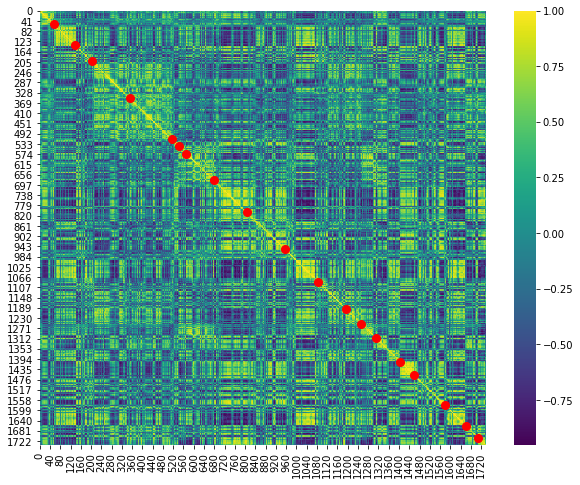

In [25]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(np.corrcoef(reservoirStatesBuffer[:,:]),cmap='viridis')#sns.heatmap(sim_matrix, square=True)
for i in ground_truth_sums:
    plt.plot(i, i,marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")


In [24]:
# set the similarity matrix
sim_matrix1 = np.empty([len(reservoirStatesBuffer),len(reservoirStatesBuffer)])
       
print(len(reservoirStatesBuffer[1]))

# calculate the cosines in the similarity matrix
for i in range(len(reservoirStatesBuffer)):
    for j in range(len(reservoirStatesBuffer)):
        sim_matrix1[i,j] = cos_sim(reservoirStatesBuffer[i],reservoirStatesBuffer[j])


1000


NameError: name 'cos_sim' is not defined

In [ ]:
fig= plt.figure(figsize=(10,9))
sns.heatmap((sim_matrix1[:300,:300]),  
            cmap='gist_rainbow', vmin=0, vmax=1)
